In [39]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

def get_artist(text):
    artists = ast.literal_eval(text)
    return ", ".join(artist['name'] for artist in artists)

In [34]:
get_artist("[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Cs0zKBU1kc0i8ypK3B9ai'}, 'href': 'https://api.spotify.com/v1/artists/1Cs0zKBU1kc0i8ypK3B9ai', 'id': '1Cs0zKBU1kc0i8ypK3B9ai', 'name': 'David Guetta', 'type': 'artist', 'uri': 'spotify:artist:1Cs0zKBU1kc0i8ypK3B9ai'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/64M6ah0SkkRsnPGtGiRAbb'}, 'href': 'https://api.spotify.com/v1/artists/64M6ah0SkkRsnPGtGiRAbb', 'id': '64M6ah0SkkRsnPGtGiRAbb', 'name': 'Bebe Rexha', 'type': 'artist', 'uri': 'spotify:artist:64M6ah0SkkRsnPGtGiRAbb'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1vyhD5VmyZ7KMfW5gqLgo5'}, 'href': 'https://api.spotify.com/v1/artists/1vyhD5VmyZ7KMfW5gqLgo5', 'id': '1vyhD5VmyZ7KMfW5gqLgo5', 'name': 'J Balvin', 'type': 'artist', 'uri': 'spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5'}]")

'David Guetta, Bebe Rexha, J Balvin'

In [36]:
df = pd.read_csv('played_out.csv', index_col=0).sort_values(by='position', ascending=True).reset_index(drop=True)
df.drop(columns = ['track.type', 'track.is_local', 'track.track_number'], inplace=True)
df['artist'] = df['track.artists'].apply(get_artist)
df.drop(columns = ['track.artists'], inplace=True)
df.rename(columns={'track.duration_ms':'duration_ms', 'track.explicit':'explicit', 'track.id':'track_id', 'track.name':'track_name', 'track.popularity':'popularity'}, inplace=True)
df.head()

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,accousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,19befa2d20a544b3819a1236cf7536c4_Harsh1,F,20,0.588,0.793,0.608,0.861,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock
1,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,6f0f1e2e101f4f208ede37b241d6fc4c_31owtsxu6xlbj...,M,20,0.588,0.793,0.608,0.861,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock
2,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,f131564c8f17444c8e0dd7274c994ddc_Harshh3,M,40,0.588,0.793,0.608,0.861,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock
3,0,2025-10-1T01:00:00:000Z,315426,False,40gRh2ZURv5tYBo8yB9Lu3,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",70,5,70a72c265ec6415aa0430a59d7dcec56_Markov Chain,M,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Ludwig van Beethoven, Paul Lewis"
4,0,2025-10-1T01:00:00:000Z,383972,False,7p6oXzBSPAXXz8Xb8gBPki,Subzero - Original Mix,45,3,85006a9ef693401aad85734c81865ca9_Maike,M,40,0.588,0.793,0.608,0.861,6.0,0.0991,-11.638,0.0,0.0673,124.988,0.118,Ben Klock


In [37]:
sample = df[df['user'] == 'b3a05964788f4433a57a6113f54418e2_AnirudhParameswaran'].sort_values(by='position', ascending=True).reset_index(drop=True)
sample.head()

,position,played_at,duration_ms,explicit,track_id,track_name,popularity,first_genre,user,gender,age,accousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,artist
0,0,2025-10-1T01:00:00:000Z,223760,False,1lK5iIMKifrxERzS3iimJH,Breathe on Me,56,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.00209,0.709,0.565,0.01250,5.0,0.0901,-6.395,0.0,0.0471,112.203,0.571,Britney Spears
1,1,2025-10-1T02:00:00:000Z,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,88,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.34200,0.520,0.731,0.00101,6.0,0.3110,-5.338,0.0,0.0557,173.930,0.662,Harry Styles
2,2,2025-12-20T17:14:51.694Z,210373,False,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,95,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.20000,0.747,0.507,0.06080,2.0,0.1170,-10.171,1.0,0.0358,104.978,0.438,Billie Eilish
3,3,2025-12-20T17:14:57.534Z,173991,False,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,84,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.12200,0.548,0.816,0.00000,0.0,0.3350,-4.209,1.0,0.0465,95.390,0.557,Harry Styles
4,4,2025-12-20T17:15:00.448Z,200600,False,7DSAEUvxU8FajXtRloy8M0,Flowers,86,1,b3a05964788f4433a57a6113f54418e2_AnirudhParame...,M,60,0.05840,0.706,0.691,0.00007,0.0,0.0232,-4.775,1.0,0.0633,118.048,0.632,Miley Cyrus


In [40]:
sample.columns

Index(['position', 'played_at', 'duration_ms', 'explicit', 'track_id',
       'track_name', 'popularity', 'first_genre', 'user', 'gender', 'age',
       'accousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'artist'],
      dtype='object')

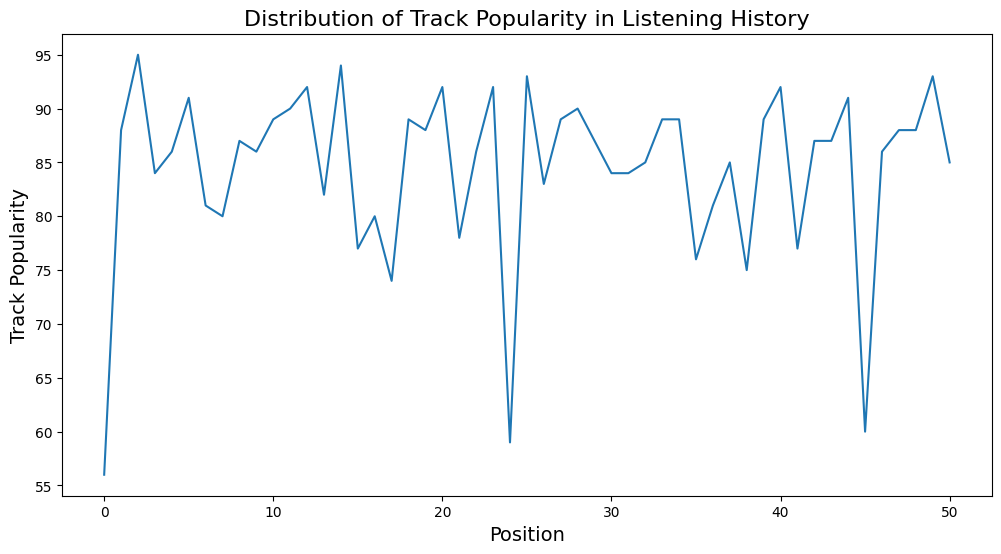

In [42]:
figure, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='position', y='popularity', data=sample, ax = ax)
ax.set_title('Distribution of Track Popularity in Listening History', fontsize=16)
ax.set_ylabel('Track Popularity', fontsize=14)
ax.set_xlabel('Position', fontsize=14)
plt.show()